### Problem Statement:
Sales management has gained importance to meet increasing competition and the
need for improved methods of distribution to reduce cost and to increase profits. Sales
management today is the most important function in a commercial and business
enterprise.

Do ETL: Extract-Transform-Load some Amazon dataset and find for me
Sales-trend -> month-wise, year-wise, yearly_month-wise

Find key metrics and factors and show the meaningful relationships between
attributes.

##### import warnings

In [1]:
import warnings
warnings.filterwarnings('ignore')

##### import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### import data

In [3]:
df = pd.read_csv("/Users/sirdjgope93/Desktop/DATA SCIENCE/Project/Analyzing_Amazon_Sales_Data/1.input/Amazon_Sales_data.csv")

In [4]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


### EDA

In [5]:
df.shape

(100, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [7]:
df.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [9]:
df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [10]:
# convert 'Order Date' column to datetime

df['Order Date'] = pd.to_datetime(df['Order Date'])

In [13]:
# Extract month and year from 'Order Date'

df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

In [31]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Year,Month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,6
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2


In [26]:
# Aggregate sales data month-wise

monthly_sales = df.groupby(['Year','Month'])['Total Revenue'].sum().reset_index()

In [32]:
monthly_sales.head()

,Year,Month,Total Revenue
0,2010,2,3410661.12
1,2010,5,2587973.26
2,2010,6,1082418.40
3,2010,10,6064933.75
4,2010,11,3458252.00


In [22]:
# Aggregate sales data year-wise

yearly_sales = df.groupby(['Year'])['Total Revenue'].sum().reset_index()

In [23]:
yearly_sales

,Year,Total Revenue
0,2010,19186024.92
1,2011,11129166.07
2,2012,31898644.52
3,2013,20330448.66
4,2014,16630214.43
5,2015,12427982.86
6,2016,12372867.22
7,2017,13373419.63


In [28]:
# Aggregate sales data yearly-month-wise

yearly_month_sales = df.groupby(['Year','Month'])['Total Revenue'].sum().unstack().fillna(0)

In [29]:
yearly_month_sales

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2010,0.00,3410661.12,0.00,0.00,2587973.26,1082418.40,0.00,0.00,0.00,6064933.75,3458252.00,2581786.39
2011,1042225.35,387002.20,0.00,2798046.49,272410.45,19103.44,97040.64,0.00,574951.92,0.00,5938385.58,0.00
2012,1012884.00,6707849.42,994765.42,4556012.38,3782781.82,2132075.27,4445093.92,576782.80,4648152.72,3042246.77,0.00,0.00
2013,0.00,3296425.02,835759.10,3262562.10,0.00,1352867.40,8545511.20,89623.98,71253.21,2702770.40,0.00,173676.25
2014,0.00,1819660.25,0.00,4510578.10,3060338.59,75591.66,688641.85,455479.04,20404.71,1352370.65,4647149.58,0.00
2015,5513227.50,2003911.12,0.00,1059987.26,0.00,0.00,1292409.45,6279.09,0.00,1904138.04,648030.40,0.00
2016,0.00,0.00,197883.40,0.00,414371.10,568269.60,600821.44,0.00,0.00,221117.00,5876405.20,4493999.48
2017,2914130.27,7115008.64,246415.95,0.00,3097864.77,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [38]:
# calculate key matrics

average_monthly_sales = df.groupby('Month')['Total Revenue'].mean().reset_index()
average_yearly_sales = df.groupby('Year')['Total Revenue'].mean().reset_index()

In [40]:
average_monthly_sales

,Month,Total Revenue
0,1,1.497495e+06
1,2,1.903117e+06
2,3,5.687060e+05
3,4,1.798576e+06
4,5,1.201431e+06
5,6,5.230326e+05
6,7,1.305793e+06
7,8,2.820412e+05
8,9,1.062953e+06
9,10,1.389780e+06


In [41]:
average_yearly_sales

,Year,Total Revenue
0,2010,1.918602e+06
1,2011,9.274305e+05
2,2012,1.449938e+06
3,2013,1.694204e+06
4,2014,1.108681e+06
5,2015,1.129817e+06
6,2016,1.237287e+06
7,2017,1.671677e+06


### Fearturized Data

In [42]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Year,Month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,6
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2


In [43]:
df.to_csv("/Users/sirdjgope93/Desktop/DATA SCIENCE/Project/Analyzing_Amazon_Sales_Data/2.output/Amazon_Sales_data.csv")

### Visualization

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

##### Plotting Monthly Sales Trend

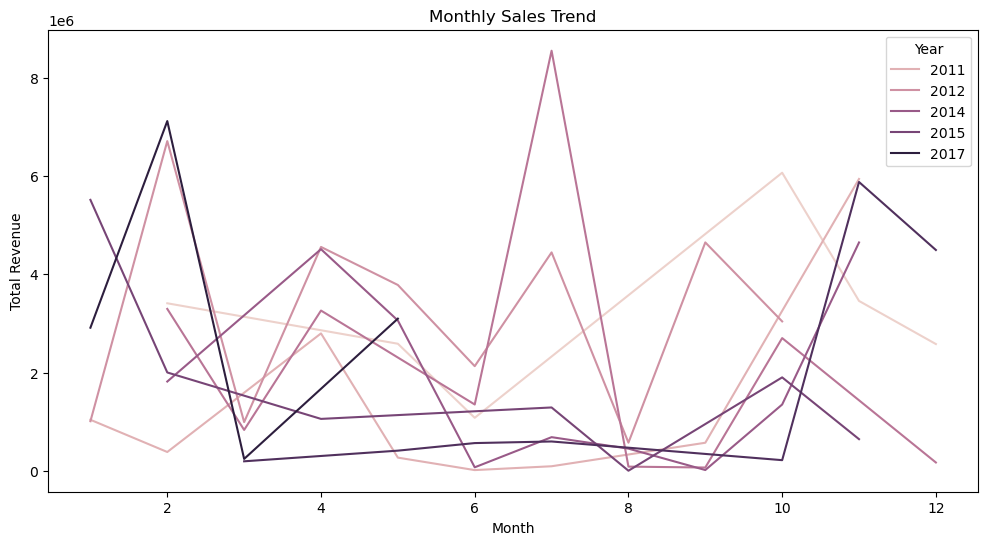

In [46]:
plt.figure(figsize=(12,6))
sns.lineplot(data = monthly_sales,x = 'Month', y = 'Total Revenue', hue = 'Year')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.legend(title='Year')
plt.show()

##### Plotting Yearly Sales Trend

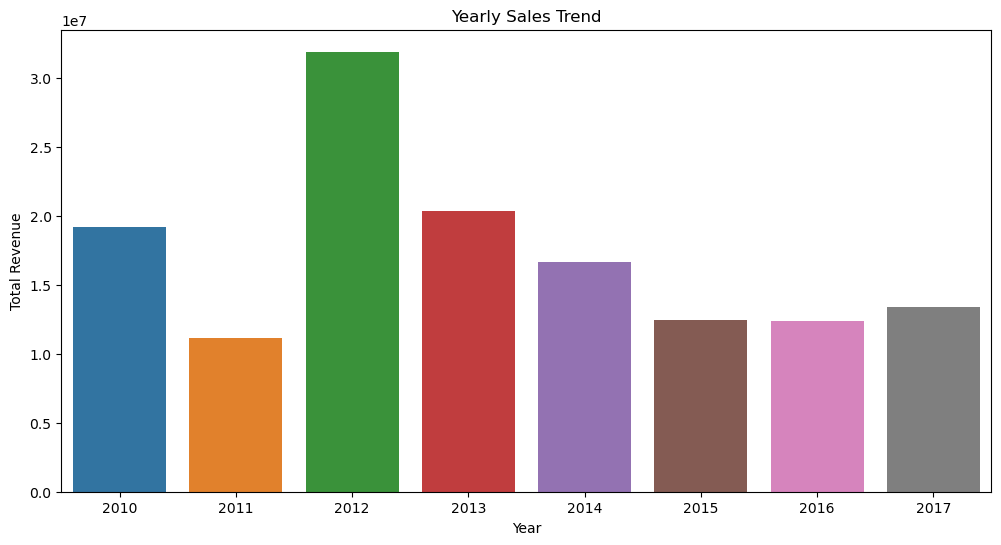

In [49]:
plt.figure(figsize=(12,6))
sns.barplot(data = yearly_sales,x='Year',y='Total Revenue')
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.show()

##### Plotting yearly-monthly Sales Trend

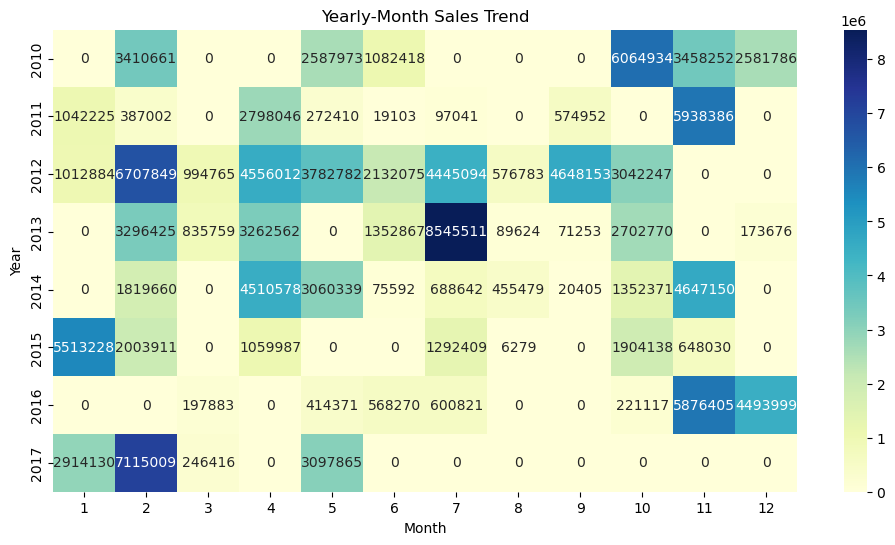

In [50]:
plt.figure(figsize=(12, 6))
sns.heatmap(yearly_month_sales, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Yearly-Month Sales Trend')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

##### Plotting average monthly sales 

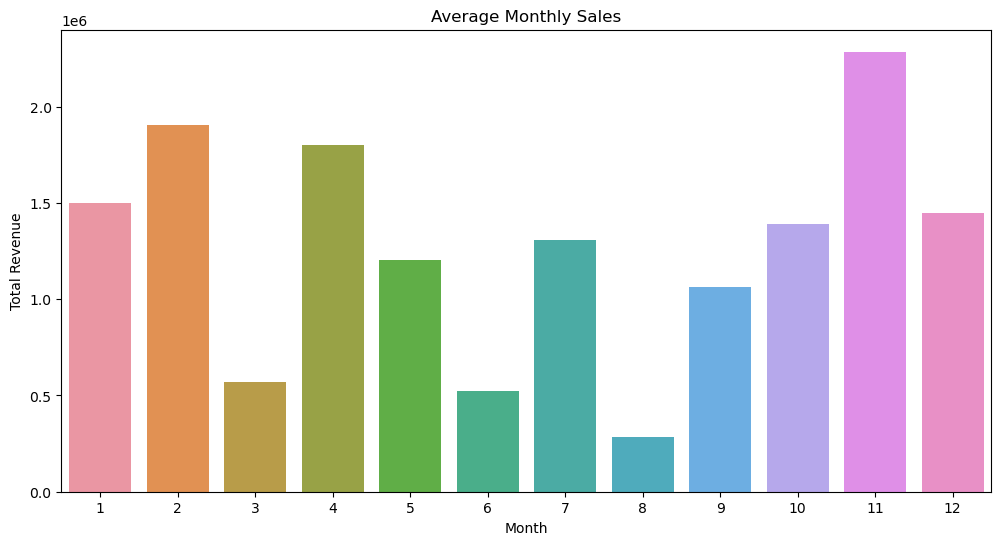

In [51]:
plt.figure(figsize=(12,6))
sns.barplot(data = average_monthly_sales,x = 'Month',y = 'Total Revenue')
plt.title('Average Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

##### Plotting average yearly sales

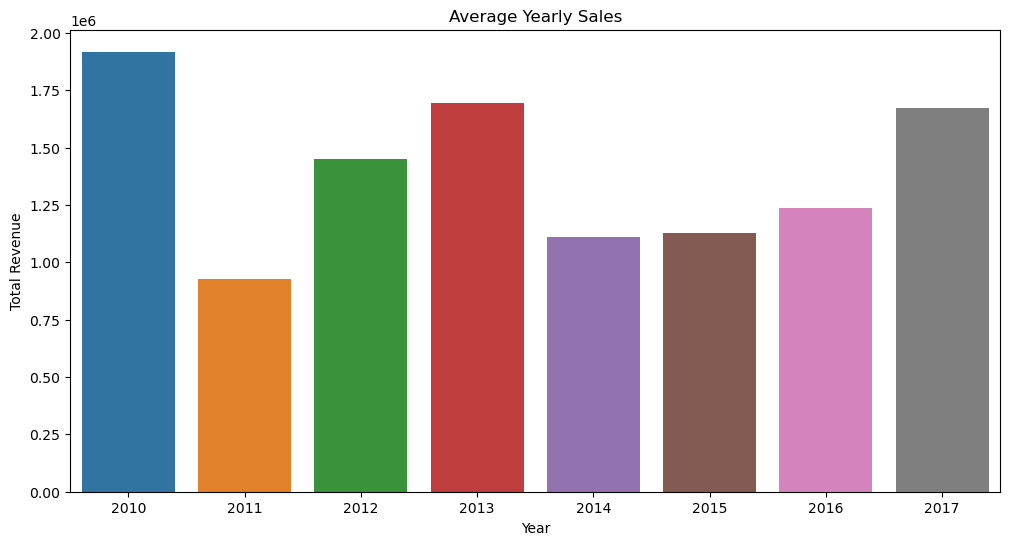

In [52]:
plt.figure(figsize=(12,6))
sns.barplot(data = average_yearly_sales,x='Year',y='Total Revenue')
plt.title('Average Yearly Sales')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.show()